# Practical Python Programming for Biologists
Author: Dr. Daniel Pass | www.CompassBioinformatics.com

---

# Data visualisation

Data visualization is a crucial aspect of bioinformatics, allowing researchers to effectively explore and communicate their findings. Python provides several powerful libraries for creating high-quality plots and interactive visualizations. In this section, we will explore three popular libraries: Matplotlib, Seaborn, and Plotly.

## Matplotlib
We've used matplotlib many times through this week already as it is an easy to use plotting library in Python, and comes pre-installed. It's straight forward and simple and provides a low-level interface for simplistic plots (line plots, scatter plots, bar plots, histograms etc). It can do much more, but can also get complex when coding for abstract data and might need additonal modules (i.e. numpy/scipy)

First lets look at some of the main parameters that we can use

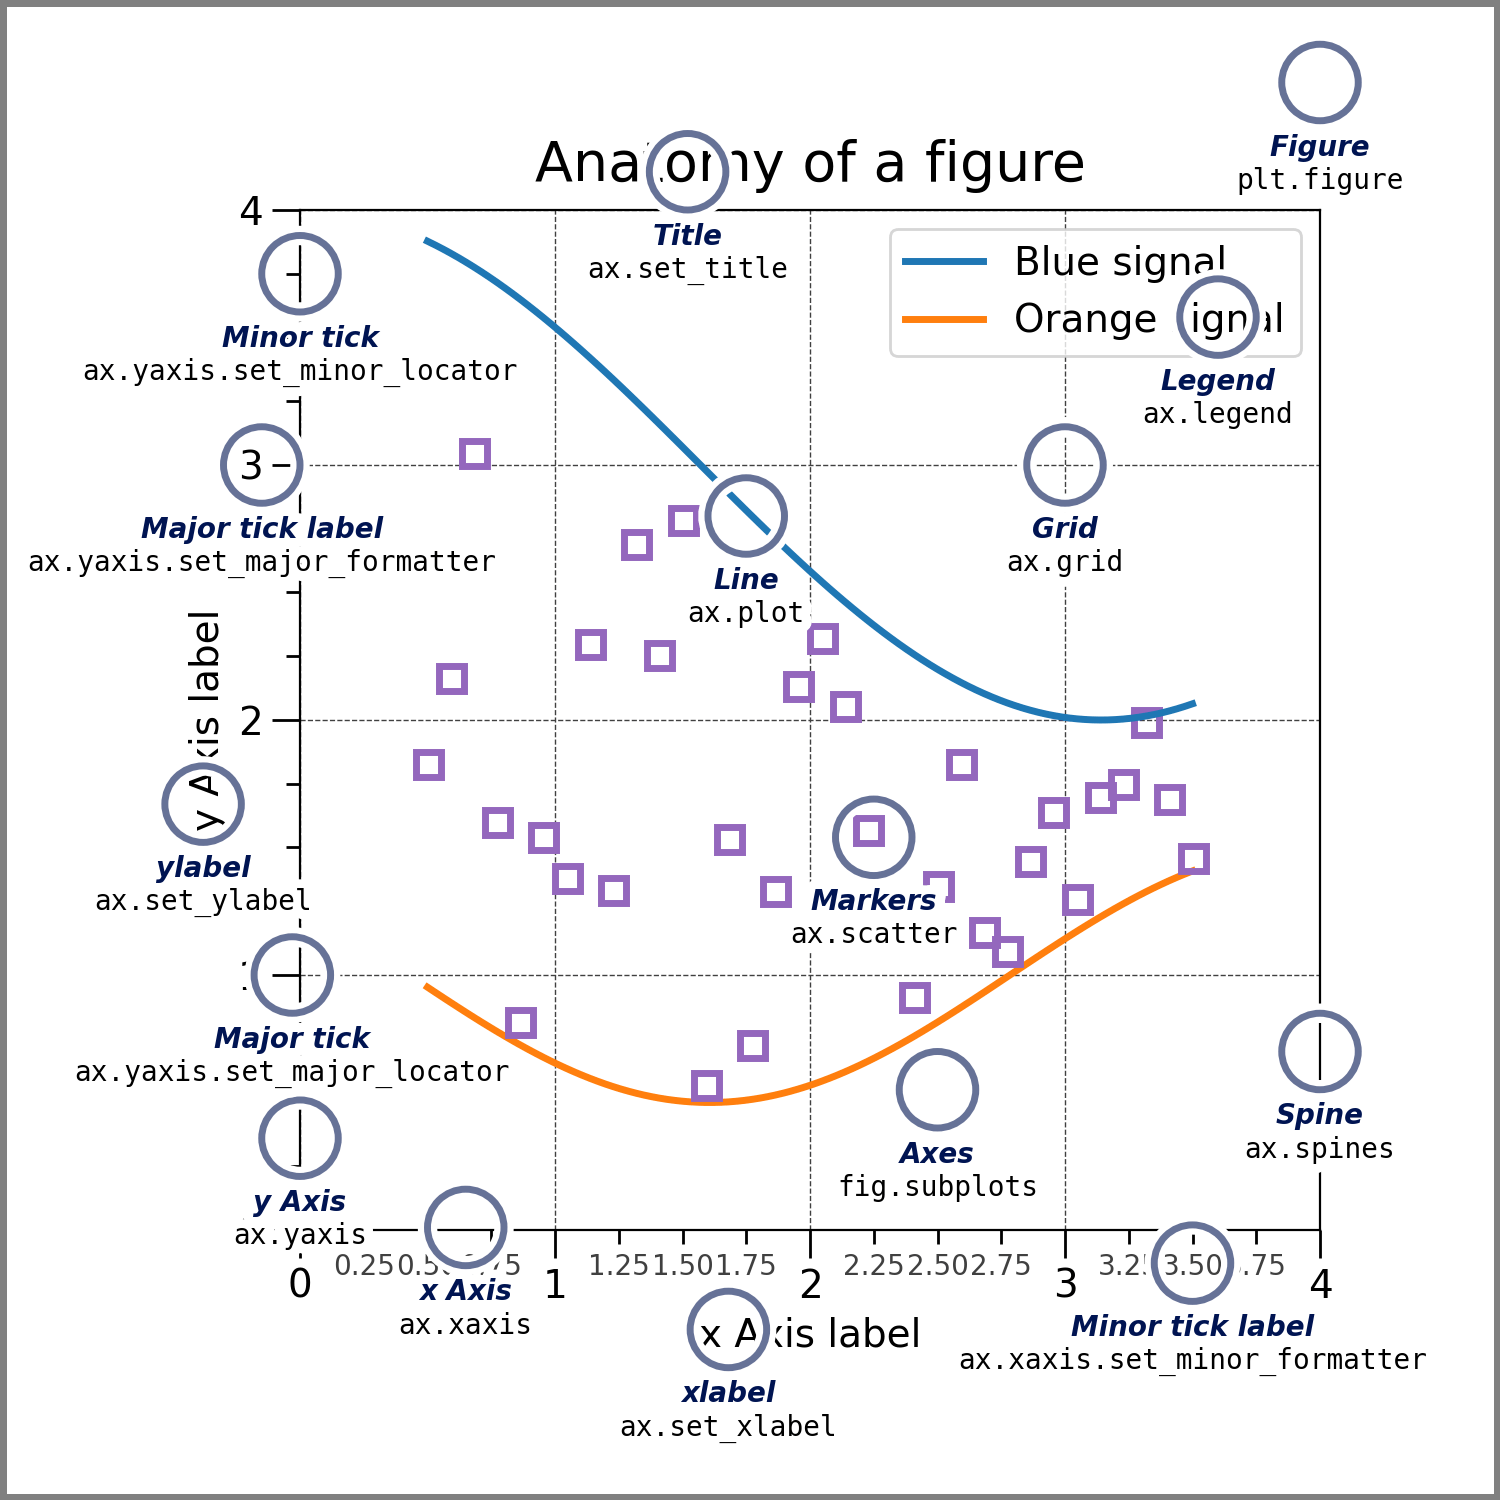

To browse all their available plot styles they can be found [here](https://matplotlib.org/stable/gallery/index.html)

If plotting numerical lists or categories it is easily achiveable with base matplotlib for example:

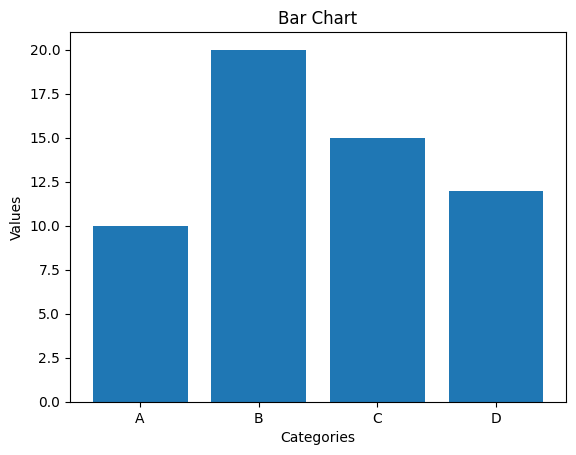

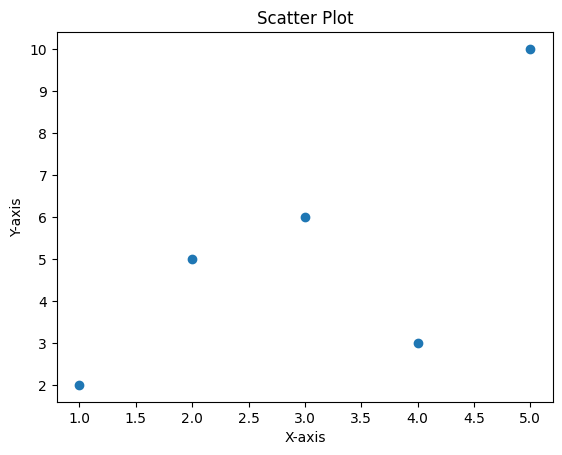

In [1]:
import matplotlib.pyplot as plt

# Category Data
x = ['A', 'B', 'C', 'D']
y = [10, 20, 15, 12]

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart')

# Create a bar chart
plt.bar(x, y)
plt.show()

################################

# Data
x = [1, 2, 3, 4, 5]
y = [2, 5, 6, 3, 10]

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Create a scatter plot
plt.scatter(x, y)
plt.show()


When working with python lists and objects matplotlib is the obvious direct option, but when working within a dataframe-type environment it is much easier to use more advanced libraries to reduce the dificulty. If using pandas you could go through the extra step of taking the data into lists, but then it is still complex to do very simple things.

Let us look at Seaborn now and then at the bottom of the page I will show you the (absolute garbage) code that I have written in matplotlib to achive the same thing, and why we don't recommend forcing everything through matplotlib!

## Seaborn

Seaborn is a higher-level data visualization library built on top of Matplotlib. It provides a simplified interface and enhances the visual appeal of plots by offering a variety of built-in themes and color palettes. Seaborn excels at creating statistical graphics, such as distribution plots, regression plots, and categorical plots.

Here we have a dataset of soil invertebrate abundance counts and some additional metadata. The data object we will use **has to be a pandas object**, so we will import that too and load the data.

Note: If you have ever worked in the R environment, a lot of this section will look familiar to you

In [2]:
import pandas as pd
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load the data as a pandas object
df = pd.read_csv("/content/visdata.csv")

# Visually check the data for safety!
print(df)
print(df.groupby("field_collected")["soil_organic_content"].mean())

     Unnamed: 0  invert_abun  soil_organic_content shade researcher   day  \
0            56       57.015                  3.00    No        Ben   Sat   
1            58       16.860                  1.76    No        Ben   Sat   
2            60       30.435                  3.21    No        Ben   Sat   
3            61       20.715                  2.00    No        Ben   Sat   
4            62       16.530                  1.98    No        Ben   Sat   
..          ...          ...                   ...   ...        ...   ...   
239         235       10.070                  1.25    No       Bill   Sat   
240         238       35.830                  4.67   Yes       Bill   Sat   
241         239       29.030                  5.92    No       Bill   Sat   
242         242       17.820                  1.75    No       Bill   Sat   
243         243       18.780                  3.00   Yes       Bill  Thur   

    field_collected  lumbricids  
0           Control           4  
1      

First lets make a simple scatter plot. Run the codeblock it first and then add the exercise line

**Exercise**: Add the field collected parameter into your plot  (```col="field_collected"```) to investigate deeper!

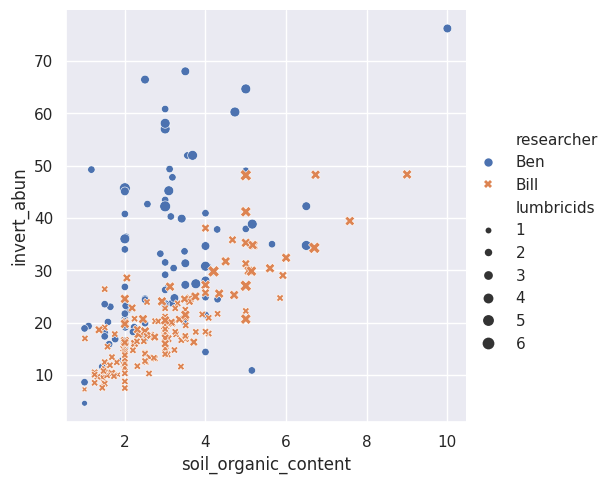

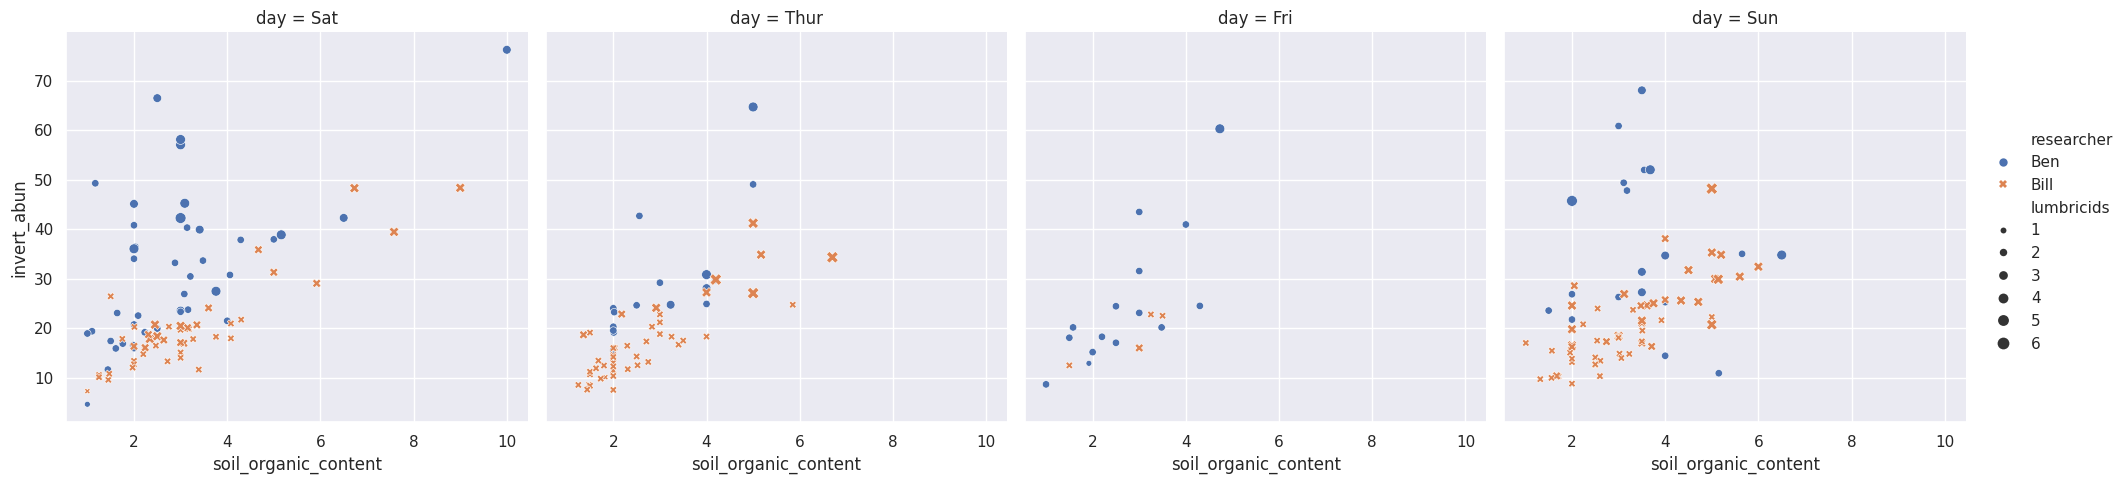

In [4]:
# Create a visualization
sns.relplot(data=df, x="soil_organic_content", y="invert_abun",
            hue="researcher",
            style="researcher",
            size="lumbricids"
)

sns.relplot(data=df, x="soil_organic_content", y="invert_abun",
            hue="researcher",
            style="researcher",
            size="lumbricids",
            col='day'
)

We can easily add additional the outputs to plot to build more complex charts

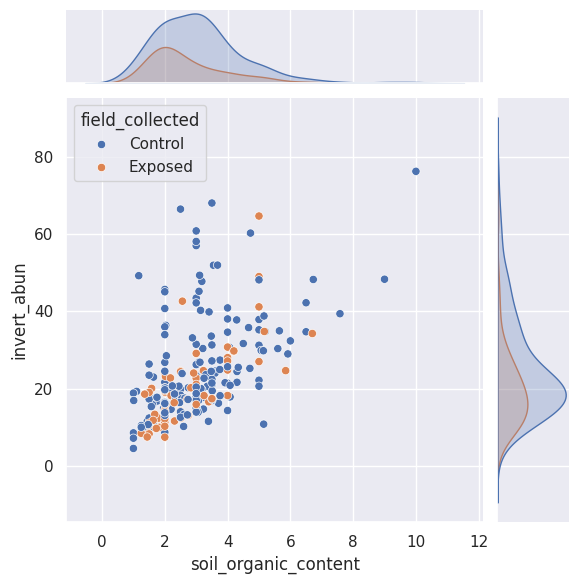

In [5]:
sns.jointplot(data=df, x="soil_organic_content", y="invert_abun", hue="field_collected")

and adding a models is (here a simple linear regression model) is straightforward:

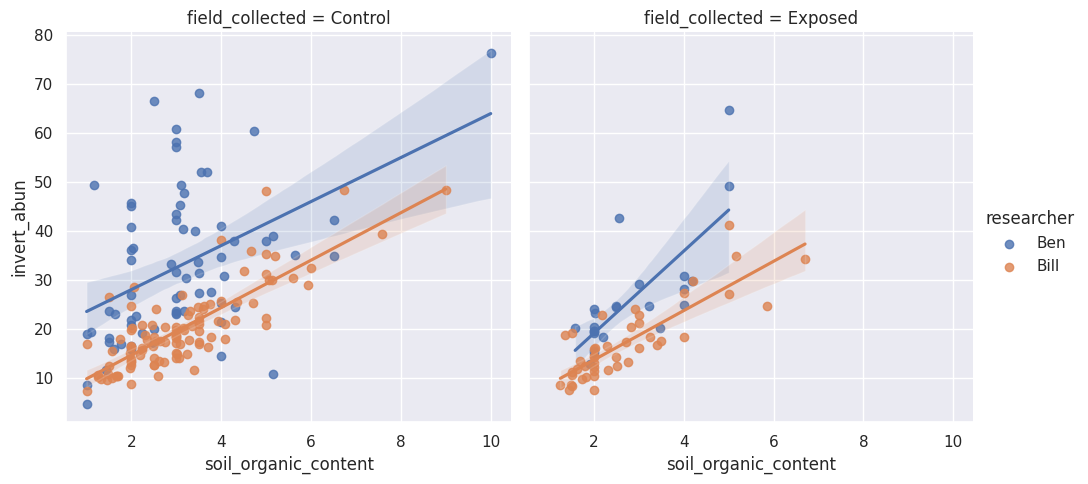

In [6]:
sns.lmplot(data=df, x="soil_organic_content", y="invert_abun", col="field_collected", hue="researcher")

Perhaps the day the data was collected affected invertebrate counting. Lets look at swarm and violin plots:

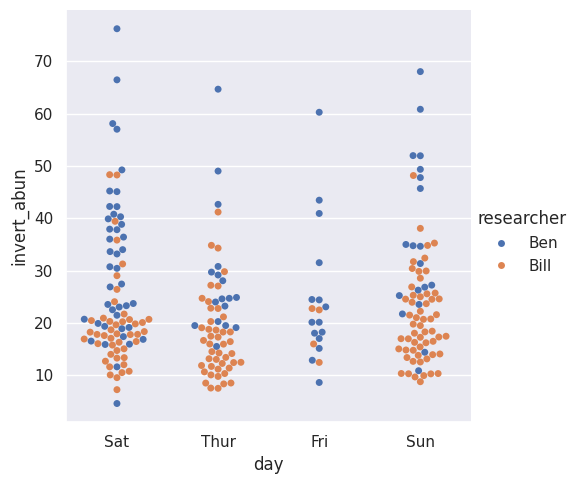

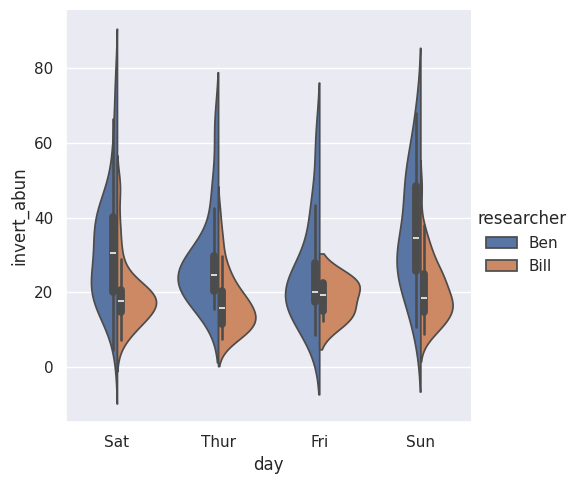

In [7]:
sns.catplot(data=df, kind="swarm", x="day", y="invert_abun", hue="researcher")
sns.catplot(data=df, kind="violin", x="day", y="invert_abun", hue="researcher", split=True)

Looks like Bill has been very consistent but Ben is a bit of a liability! Especially on the weekends he seems to be double over-counting bugs!

Seaborn has a [huge library of visualisation methods](https://seaborn.pydata.org/examples/index.html) which follow the format we've looked at here. However, this is a section of text they include in their manual about it's reliance on matplotlib, and the benefits of studying both:

> Seaborn’s integration with matplotlib allows you to use it across the many environments that matplotlib supports, including exploratory analysis in notebooks, real-time interaction in GUI applications, and archival output in a number of raster and vector formats.

> While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.



### Exercise

1. Browse the seaborn library of visualisations and choose one that I haven't given as an example, and create a new plot with this data
2. Extension: If you've had enough of plotting, run some stats tests using scipy from the previous session

In [ ]:
# Your code


### Saving your outputs

We want to keep out figures. Seaborn is generating the figure instructions, but it's matplotlib has the has a function named `.savefig()` which we can use. If you want to increase the resolution the parameter `dpi=300` can be used.

In [ ]:
import matplotlib.pyplot as ply

plt.savefig('my_figure.png')


## Plotly

I like plotly for one main reason, and that is the interactivity. It does lots of similar functions to Seaborn but bacuse you can rapidly filter and modify the data it means it is really powerful for data exploration and first investigations.

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("/content/visdata.csv")

Lets recreate our plot from earlier first:

In [ ]:
fig = px.scatter(df, x="soil_organic_content", y="invert_abun",
                 facet_col="field_collected",
                 color="researcher")
fig.show()

And we can also add in our supplementary figures alongside, with the same level of interaction

In [ ]:
fig = px.scatter(df, x="soil_organic_content", y="invert_abun",
                 color="researcher",
                 marginal_y="violin", marginal_x="box",
                 trendline="ols",
                 template="simple_white")
fig.show()

Some plots are more visually exciting than actually useful, but try clicking on a day to investigate it further:

In [ ]:
fig = px.sunburst(df, path=['day', 'researcher', 'field_collected'], color='researcher')
fig.show()

But the interactivity when working with 3D plots can be helpful to investigate!

In [ ]:
fig = px.scatter_3d(df, x="soil_organic_content", y="invert_abun", z='lumbricids',
              color='field_collected', size_max=18,
              symbol='researcher', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

For a final demonstration of plotly's ability to rapidly visualise data lets look at a more complex three dimensional dataset.

This first code block reads a pandas dataframe and can show it in default style, but the second codeblock adds some displpay parameters and a button to swap 3D/heatmap

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# create figure
fig = go.Figure()
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

fig.show()

In [ ]:
# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Set aspect ratio
fig.update_scenes(aspectratio=dict(x=1, y=1, z=0.7), aspectmode="manual")

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

---

## Returning to matplotlib

As I said above, here is the code to try and achive the same scatterplot as seaborn did, purely in matplotlib. As you can see it requires a lot of additional steps, and this took me a long time to work out as it is not something usually worthwhile! And I still can't solve why the colour legend category goes long.

Seaborn, Plotly, and higher-level packages are the way to go!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data from file
data = pd.read_csv("/content/visdata.csv")

# Extract columns
invert_abun = data['invert_abun']
soil_organic_content = data['soil_organic_content']
researcher = data['researcher']

# Create a figure and axes
fig, ax = plt.subplots()

# Get unique categories
categories = np.unique(researcher)

# Assign numeric values to categories
category_mapping = {cat: i for i, cat in enumerate(categories)}
colours = [category_mapping[cat] for cat in researcher]

# Scatter plot
scatter = ax.scatter(invert_abun, soil_organic_content, c=colours, cmap='Set1')

# Set labels and title
ax.set_xlabel('Invertebrate Abundance')
ax.set_ylabel('Soil Organic Content')
ax.set_title('Relationship between Invertebrate Abundance and Soil Organic Content')

# Add a colorbar
cbar = plt.colorbar(scatter, ticks=np.arange(len(categories)))
cbar.set_ticklabels(categories)
cbar.set_label('Researcher')

# Set the figure size
fig.set_size_inches(8, 6)

# Show the plot
plt.show()